<a href="https://colab.research.google.com/github/HovhannesArustamyan/in_hospital_death_classification/blob/master/data_analysis_and_different_algorithms_selections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef

***Reading Data***

In [2]:
pd.options.display.max_columns = 200
df = pd.read_csv('/content/drive/MyDrive/survival_dataset.csv')

***NaN values visualisation of whole data***


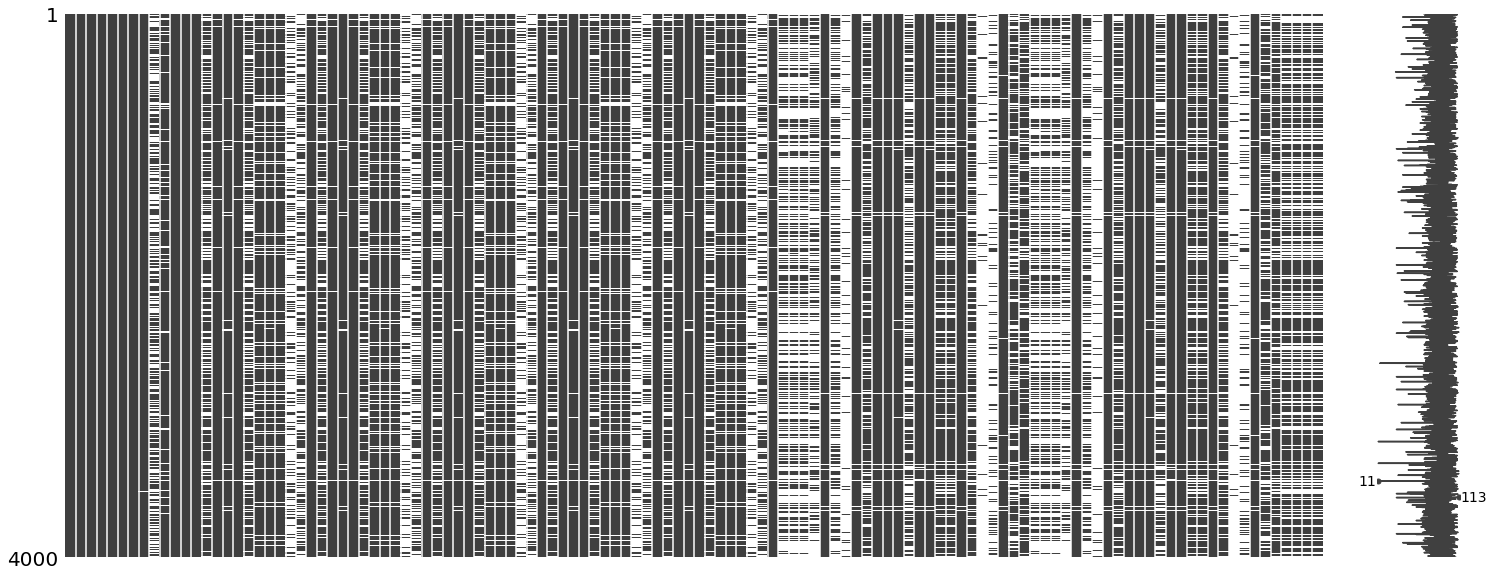

In [3]:
def nanvalues(df):
  msno.matrix(df)
  
nanvalues(df)

***Selecting columns . step 1***

In [4]:
selected_features = df.loc[:,['SAPS-I',	'SOFA',	'Length_of_stay',	'Age',	'Gender',	'Weight',	'CCU',	'CSRU',	'SICU','DiasABP_first',
                              'GCS_first',	'Glucose_first',	'HR_first',	'MAP_first',	'NIDiasABP_first','NIMAP_first',	'NISysABP_first',
                              'Temp_first',	'DiasABP_last',	'GCS_last',	'Glucose_last','HR_last',	'MAP_last',	'NIDiasABP_last',	'NIMAP_last',
                              'NISysABP_last',	'Temp_last',	'DiasABP_lowest',	'GCS_lowest',	'Glucose_lowest',	'HR_lowest',	'MAP_lowest',
                              'NIDiasABP_lowest',	'NIMAP_lowest',	'NISysABP_lowest', 'Temp_lowest',	'DiasABP_highest',	'GCS_highest',	
                              'Glucose_highest',	'HR_highest',	'MAP_highest',	'NIDiasABP_highest',	'NIMAP_highest',	'NISysABP_highest',	
                              'Temp_highest',	'DiasABP_median',	'GCS_median',	'Glucose_median',	'HR_median',	'MAP_median',	'NIDiasABP_median',	
                              'NIMAP_median',	'NISysABP_median',	'Temp_median',	'BUN_first',	'Creatinine_first',	'FiO2_first',	'HCO3_first',	
                              'HCT_first',	'K_first',	'Mg_first',	'Na_first',	'PaCO2_first',	'PaO2_first',	'Platelets_first',	'SysABP_first',
                              'WBC_first',	'Weight_first',	'pH_first',	'BUN_last',	'Creatinine_last',	'FiO2_last',	'HCO3_last',	'HCT_last',
                              'K_last',	'Mg_last',	'Na_last',	'PaCO2_last',	'PaO2_last',	'Platelets_last',	'SysABP_last',	'WBC_last',	'In-hospital_death']]

***Seperating selected columns into 2 parts  for a good visualisation***

In [5]:
selected_features_first_part = df.loc[:,['SAPS-I',	'SOFA',	'Length_of_stay',	'Age',	'Gender',	'Weight',	'CCU',	'CSRU',	'SICU','DiasABP_first',
                              'GCS_first',	'Glucose_first',	'HR_first',	'MAP_first',	'NIDiasABP_first','NIMAP_first',	'NISysABP_first',
                              'Temp_first',	'DiasABP_last',	'GCS_last',	'Glucose_last','HR_last',	'MAP_last',	'NIDiasABP_last',	'NIMAP_last',
                              'NISysABP_last',	'Temp_last',	'DiasABP_lowest',	'GCS_lowest',	'Glucose_lowest',	'HR_lowest',	'MAP_lowest',
                              'NIDiasABP_lowest',	'NIMAP_lowest',	'NISysABP_lowest', 'Temp_lowest',	'DiasABP_highest',	'GCS_highest',	
                              'Glucose_highest',	'HR_highest',	'MAP_highest',	'NIDiasABP_highest',	'NIMAP_highest',	'NISysABP_highest']]


In [6]:
selected_features_second_part = df.loc[:,['Temp_highest',	'DiasABP_median',	'GCS_median',	'Glucose_median',	'HR_median',	'MAP_median',	'NIDiasABP_median',	
                              'NIMAP_median',	'NISysABP_median',	'Temp_median',	'BUN_first',	'Creatinine_first',	'FiO2_first',	'HCO3_first',	
                              'HCT_first',	'K_first',	'Mg_first',	'Na_first',	'PaCO2_first',	'PaO2_first',	'Platelets_first',	'SysABP_first',
                              'WBC_first',	'Weight_first',	'pH_first',	'BUN_last',	'Creatinine_last',	'FiO2_last',	'HCO3_last',	'HCT_last',
                              'K_last',	'Mg_last',	'Na_last',	'PaCO2_last',	'PaO2_last',	'Platelets_last',	'SysABP_last',	'WBC_last',	'In-hospital_death']]

***NaN values visualisation of selected columns***

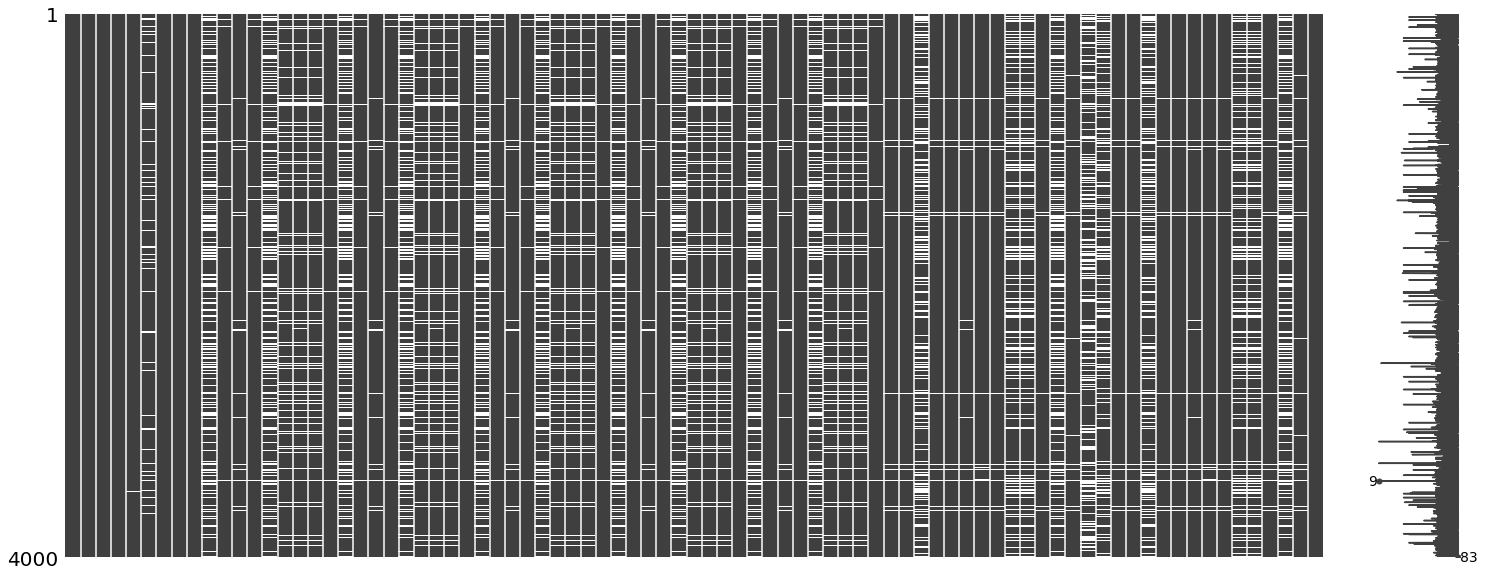

In [7]:
def nanvalues(df):
  msno.matrix(df)
  
nanvalues(selected_features)

***Correlation matrixes of selected columns***

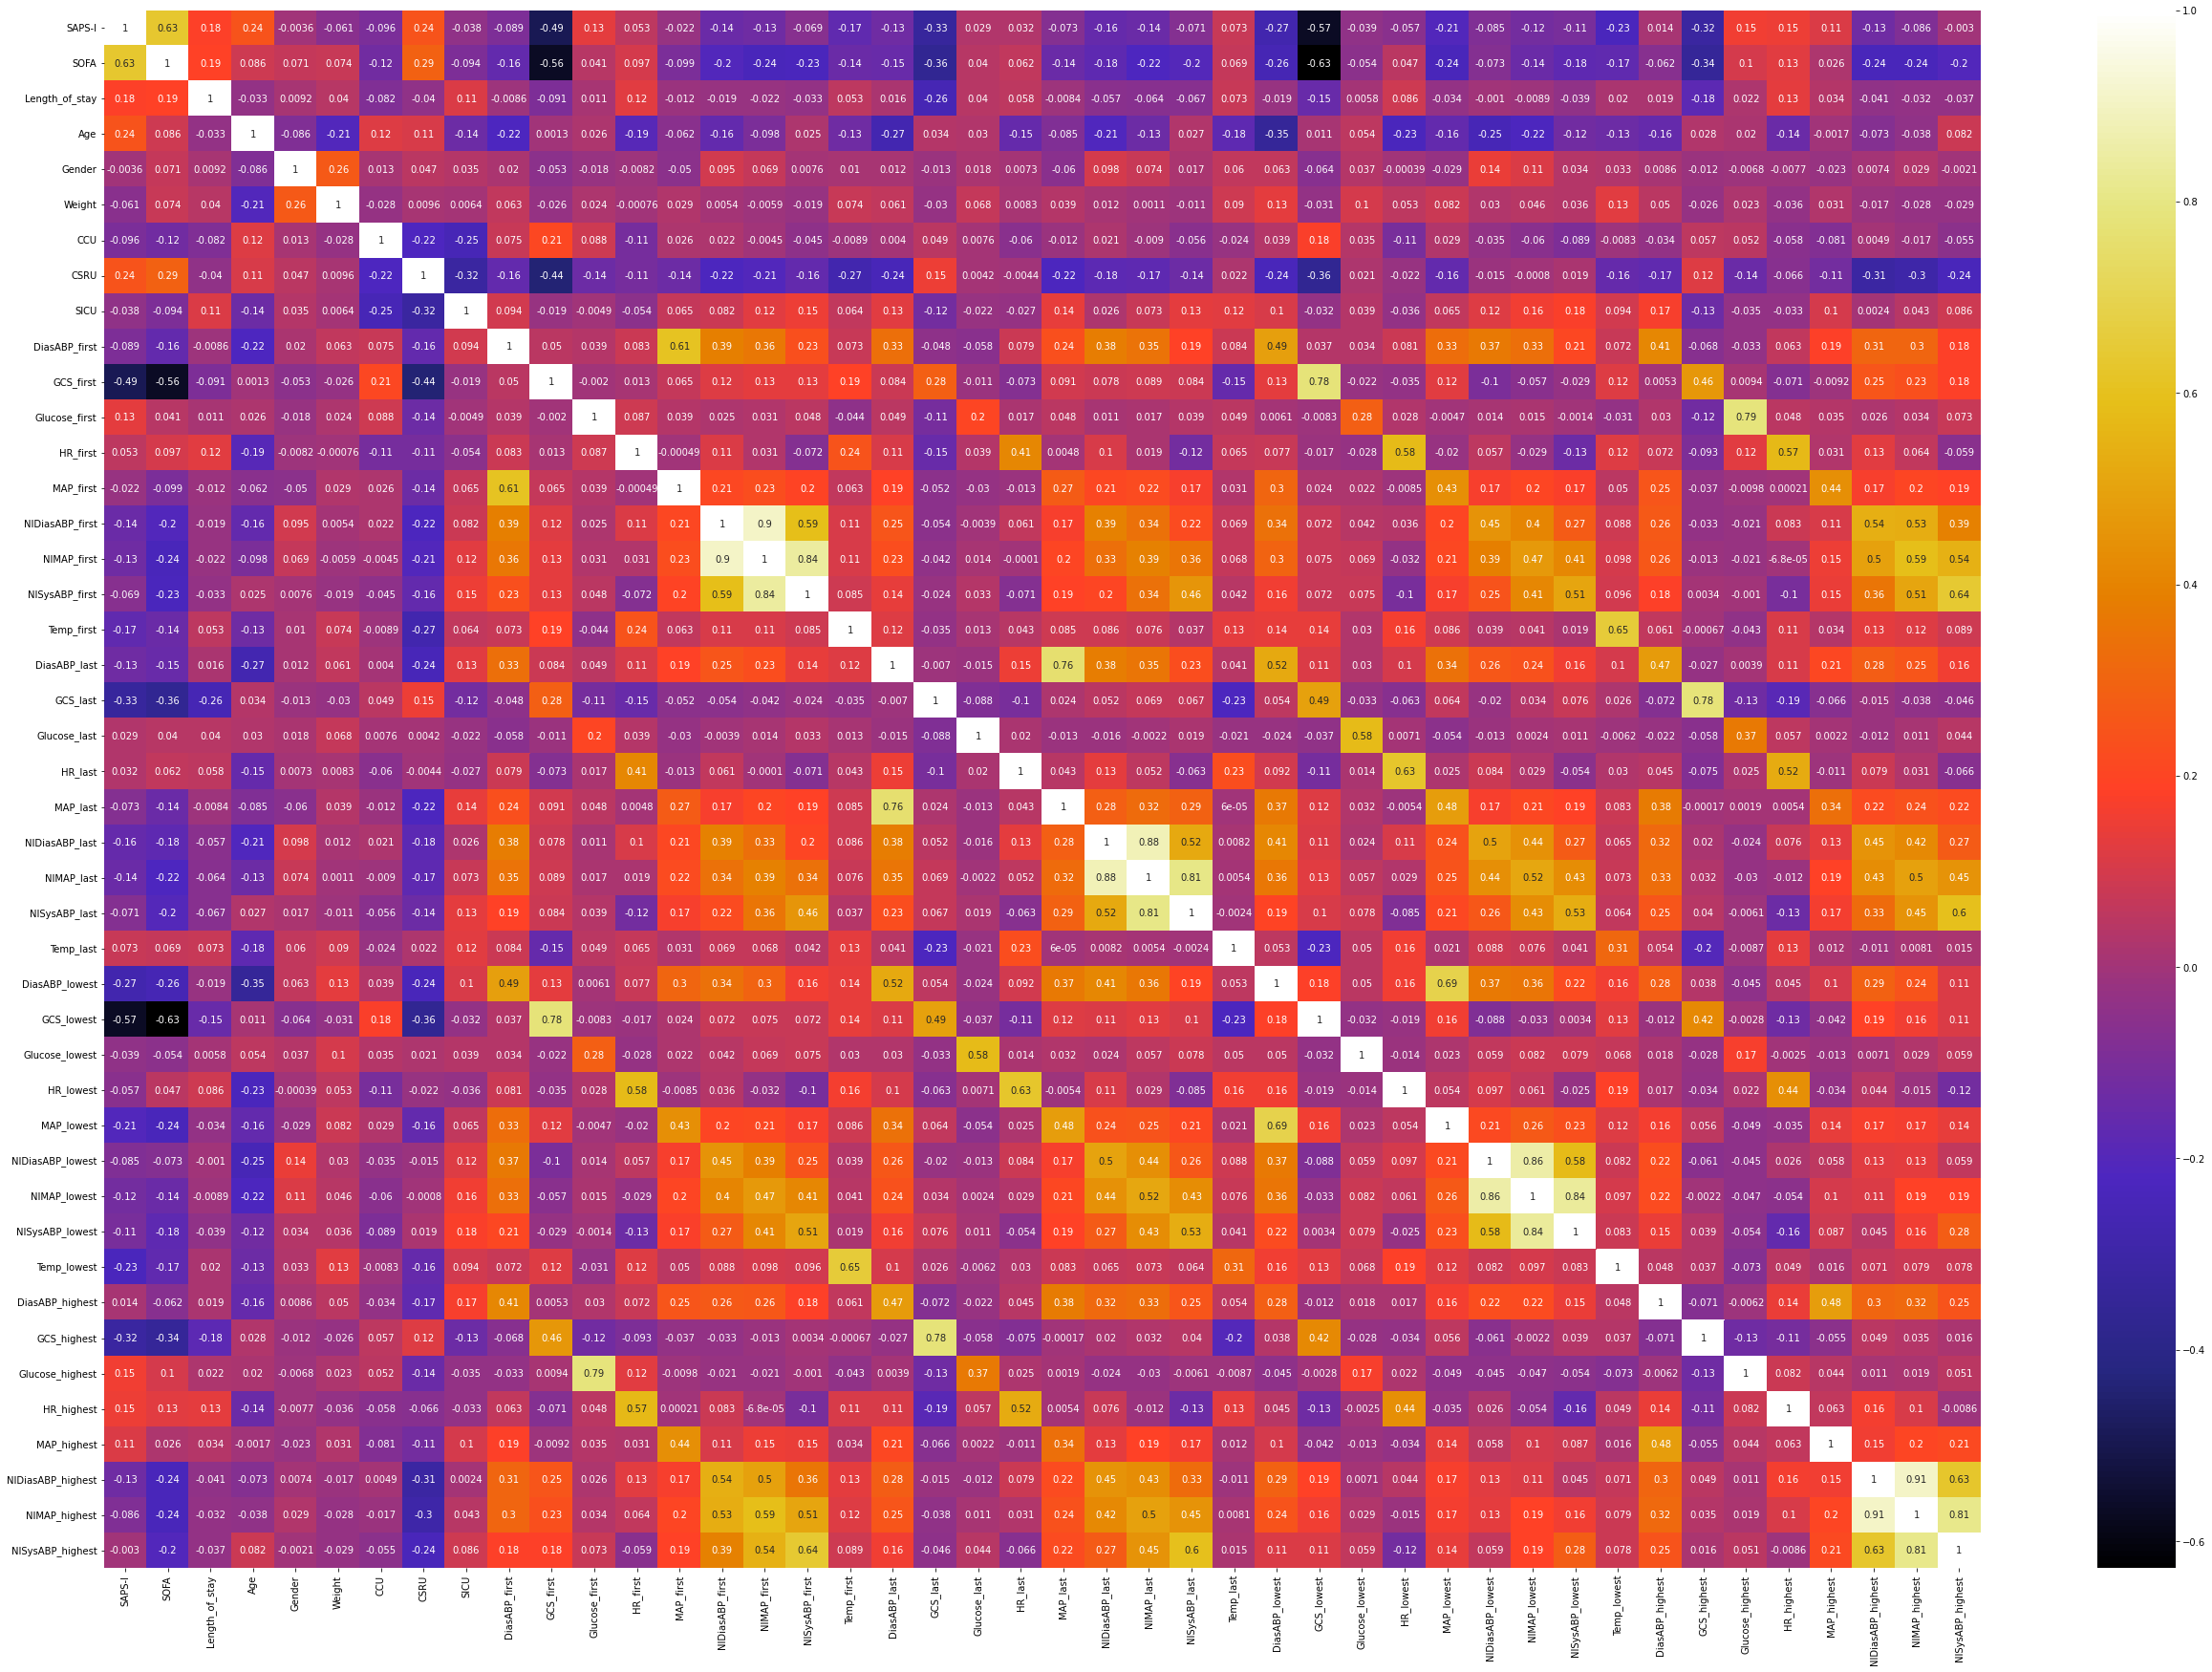

In [8]:
plt.figure(figsize=(44,30))
cor = selected_features_first_part.corr()
sns.heatmap(cor, annot=True, cmap='CMRmap')
plt.show()

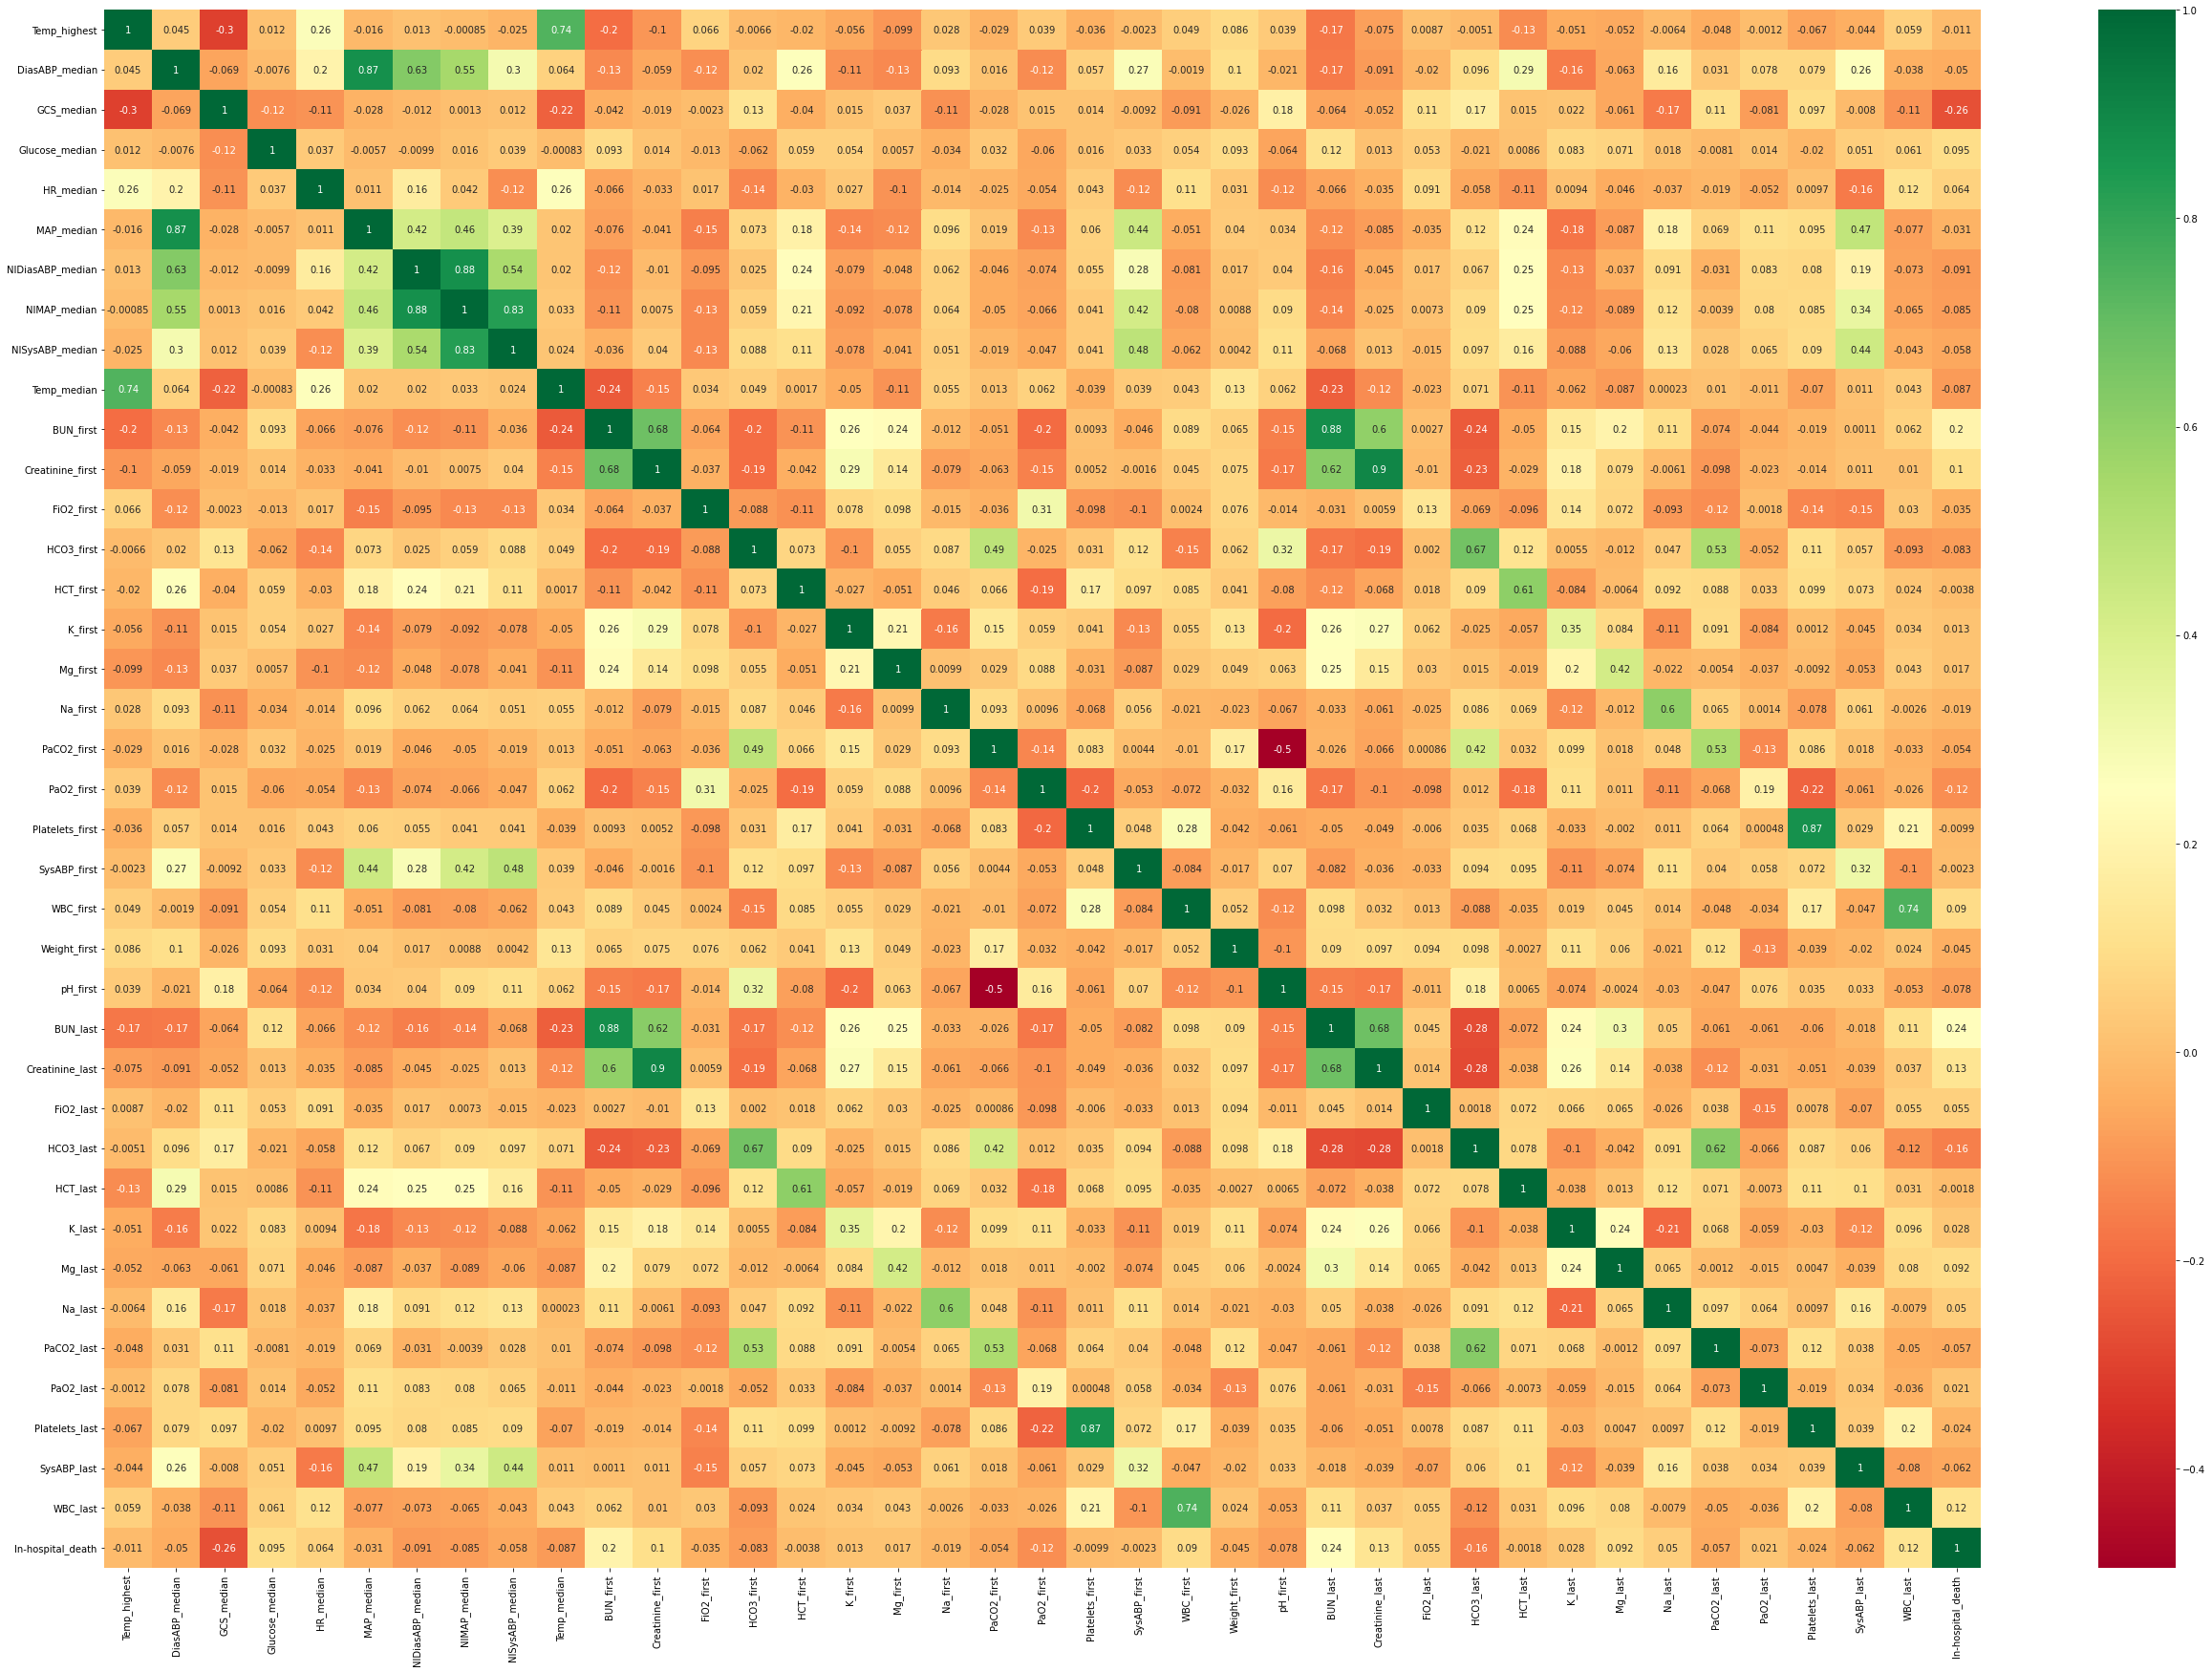

In [9]:
plt.figure(figsize=(44,30))
cor = selected_features_second_part.corr()
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

***Selecting columns as final columns***

In [10]:
selected_columns_final = selected_features[["WBC_last", "Creatinine_last", "SOFA", "Length_of_stay", "Age", "HR_last", "Temp_first", "Temp_last", "In-hospital_death"]]

***Correlation matrix of final columns***

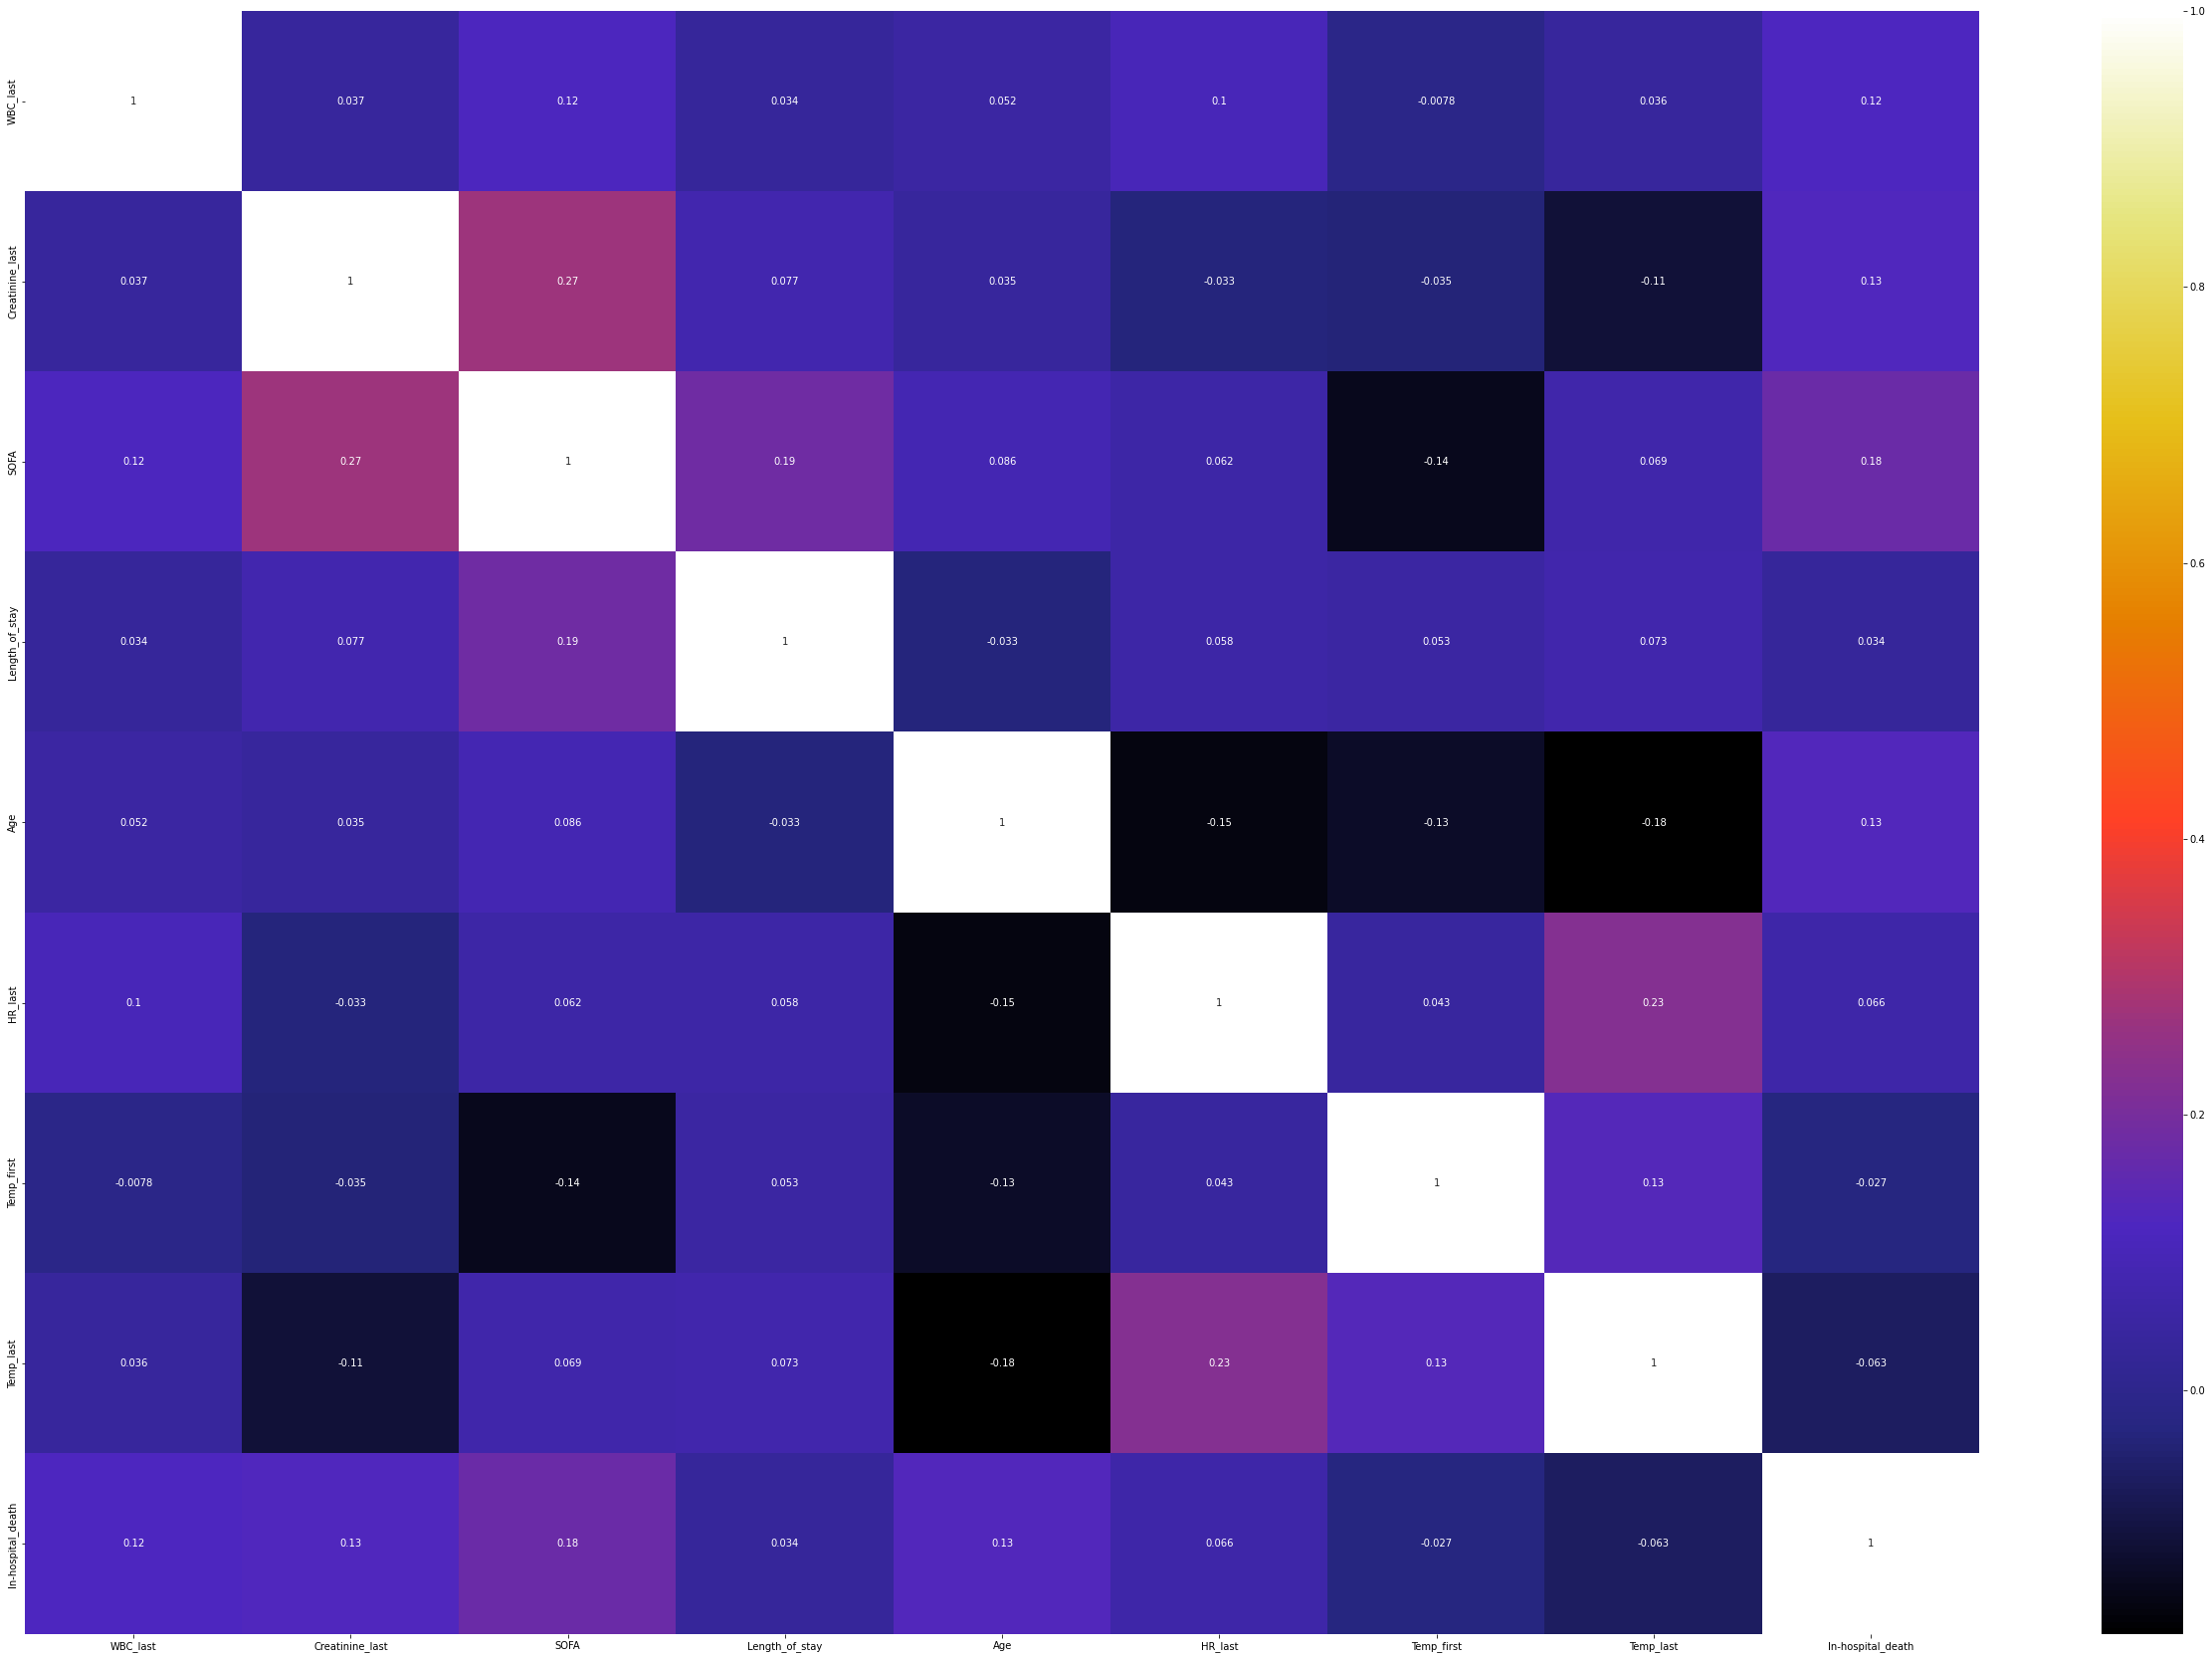

In [11]:
plt.figure(figsize=(44,30))
cor = selected_columns_final.corr()
sns.heatmap(cor, annot=True, cmap='CMRmap')
plt.show()

***NaN values visualisation of final columns***

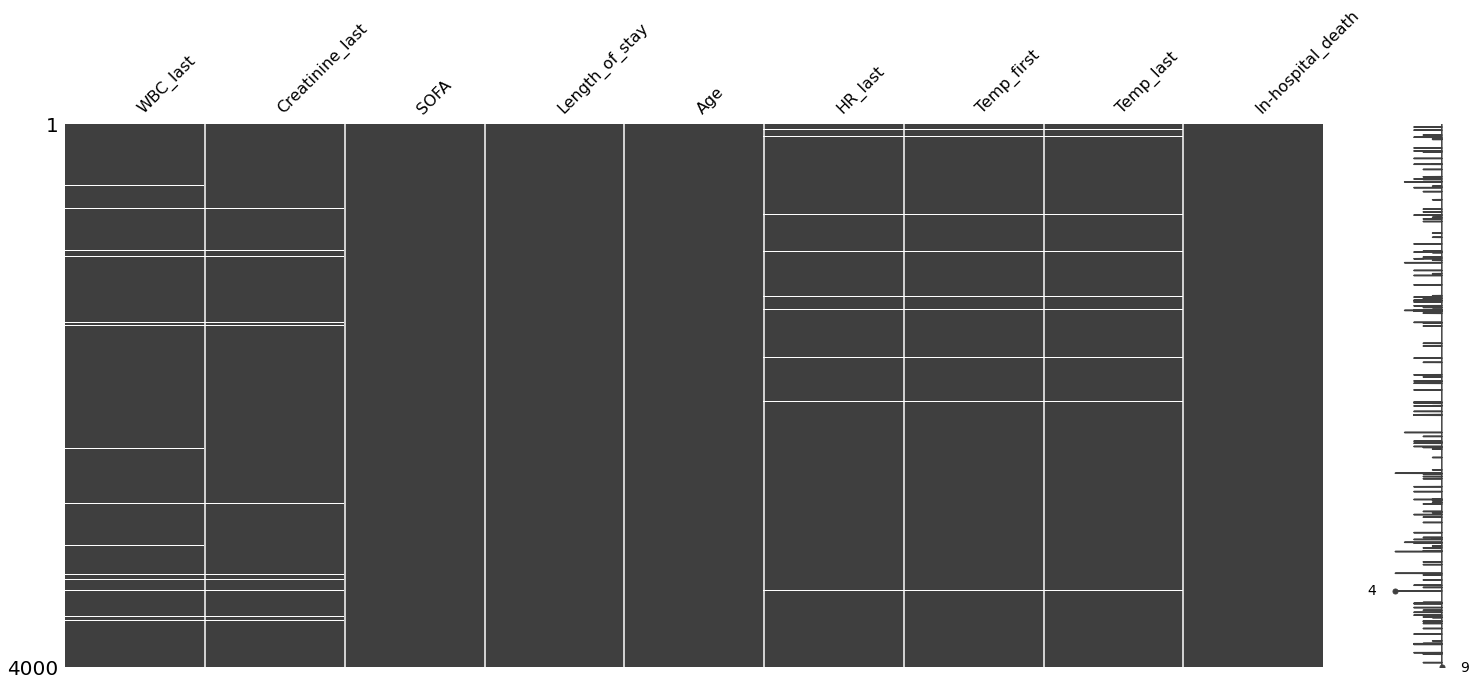

In [12]:
def nanvalues(df):
  msno.matrix(df)
  
nanvalues(selected_columns_final)

***Filling NaNs using KNN imputer***

In [14]:
imputer = KNNImputer(n_neighbors=3)
filled_data = imputer.fit_transform(selected_columns_final)
filled_data = pd.DataFrame(filled_data)

***Separating data into X and y***

In [15]:
X = filled_data.iloc[:,:-1]
y = filled_data.iloc[:,-1].replace(0,-1).astype('int64')

***Train test spliting***

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

***Ploting correlation matrix***

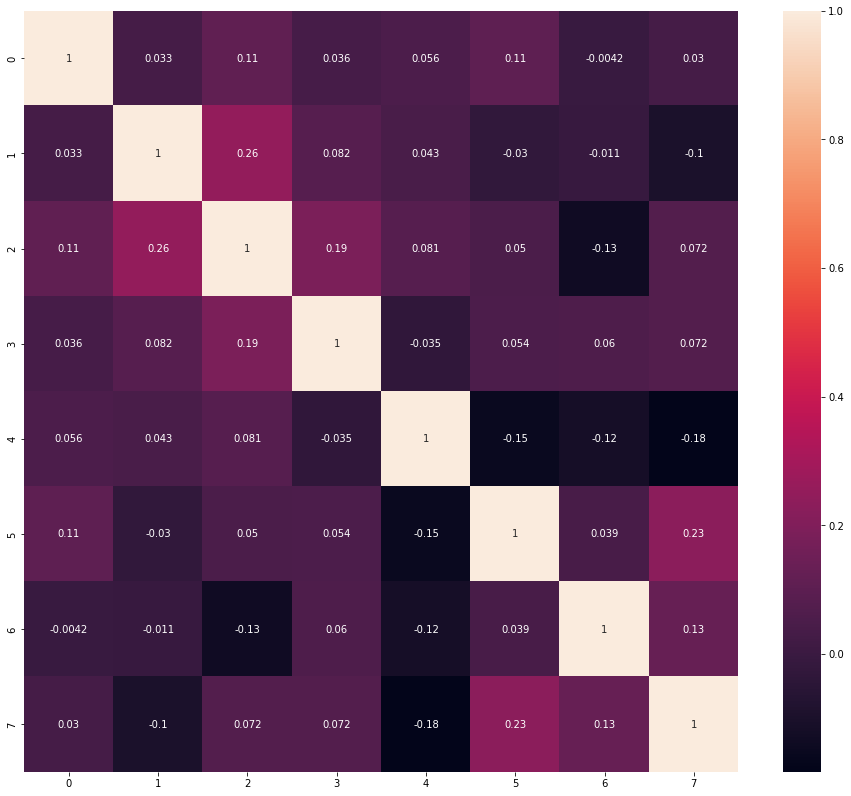

In [17]:
plt.figure(figsize=(16,14))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

***Scaling data with StandardScaler***

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

***Defining SVM empty models for GridSearchCV***

In [19]:
svm = SVC(random_state=0)

***Creating hyperparameters for SVM model***

In [20]:
regular_params = [float(num) for num in list(range(1,9))] 
grid_params_svm = {"kernel": ['rbf', 'linear', 'poly'],
                   "C": regular_params}

***Defining grid object and fit method for SVM***

In [21]:
grid_svm = GridSearchCV(svm, param_grid=grid_params_svm, cv=5, return_train_score=False)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
                         'kernel': ['rbf', 'linear', 'poly']})

***Finding best parameters for SVM***

In [22]:
grid_svm.best_params_

{'C': 2.0, 'kernel': 'rbf'}

***SVM model tuning and calculating accuracy***

In [23]:
svm_tunned = SVC(C=2, kernel='rbf')
svm_tunned.fit(X_train_scaled, y_train)
y_pred_train = svm_tunned.predict(X_train_scaled)
y_pred_test = svm_tunned.predict(X_test_scaled)
print("MCC score svm ", matthews_corrcoef(y_test, y_pred_test))

MCC score svm  0.24927081870446283


***Defining knn  empty models for GridSearchCV***

In [24]:
knn = KNeighborsClassifier()

***Creating hyperparameters for knn model***

In [25]:
k_range = list(range(1,19))
param_grid=dict(n_neighbors=k_range)

***Defining grid object and fit method for knn***

In [26]:
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, return_train_score=False)
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18]})

***Finding best parameters for knn***

In [27]:
grid_knn.best_params_

{'n_neighbors': 10}

***KNN model tuning and calculating accuracy***

In [28]:
knn_tunned = KNeighborsClassifier(grid_knn.best_params_['n_neighbors'])
knn_tunned.fit(X_train_scaled, y_train.values)
y_pred_train = knn_tunned.predict(X_train_scaled)
y_pred_test = knn_tunned.predict(X_test_scaled)
print("Test mcc score knn ", matthews_corrcoef(y_test, y_pred_test))

Test mcc score knn  0.18510307282924898


***Defining decission tree empty model for GridSearchCV***

In [29]:
tree = DecisionTreeClassifier(random_state=0)

***Creating hyperparameters for tree model***

In [30]:
grid_params_tree ={"max_depth": list(range(1,14)) , "criterion": ['gini' , 'entropy']}

***Defining grid object and fit method for tree***

In [31]:
grid_tree = GridSearchCV(tree, grid_params_tree, cv=5, return_train_score=False)
grid_tree.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13]})

***Finding best parameters for tree***

In [32]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 2}

***Tree model tuning and calculating accuracy***

In [33]:
tree_tunned = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_tunned.fit(X_train, y_train)
y_pred_train = tree_tunned.predict(X_train)
y_pred_test = tree_tunned.predict(X_test)
print("MCC test" , matthews_corrcoef(y_test, y_pred_test))

MCC test 0.2196034874161265
